In [1]:
from keras.models import Sequential
from keras.layers import Dense

import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets('./', one_hot=True)

Using TensorFlow backend.


Extracting ./train-images-idx3-ubyte.gz
Extracting ./train-labels-idx1-ubyte.gz
Extracting ./t10k-images-idx3-ubyte.gz
Extracting ./t10k-labels-idx1-ubyte.gz


In [2]:
x, y = mnist.train.next_batch(20)
x.shape

(20, 784)

In [3]:
28*28

784

In [4]:
y.shape

(20, 10)

In [5]:
y

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.

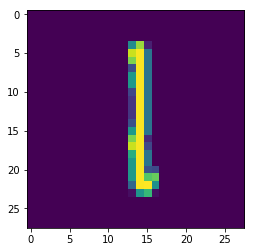

In [21]:
plt.imshow(x[1].reshape(28,28))
plt.show()

In [23]:
softmax([-3, 2, 1]) =>  exp(-3)/(exp(-3)+exp(2)+exp(1)) exp(2)/(exp(-3)+exp(2)+exp(1))  

SyntaxError: invalid syntax (<ipython-input-23-f4292bf9481d>, line 1)

In [7]:
model = Sequential()
model.add(Dense(100, activation='relu', input_dim=784))
model.add(Dense(50, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [8]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [9]:
def get_batch(dataset, batch_size = 256):
    while (1):
        yield dataset.next_batch(batch_size)

In [10]:
batch_size = 256
test_gen = get_batch(mnist.test, batch_size)
steps_per_epoch = mnist.test.num_examples// batch_size
model.evaluate_generator(test_gen, steps_per_epoch)

[2.3848805183019395, 0.088241185897435903]

In [24]:
batch_size = 256
data_gen = get_batch(mnist.train, batch_size)
steps_per_epoch = mnist.train.num_examples//batch_size

model.fit_generator(data_gen, steps_per_epoch, epochs=1)

Epoch 1/1
214/214 [==============================] - 1s - loss: 0.2273 - acc: 0.9368     


In [12]:
model.evaluate_generator(test_gen, steps_per_epoch)

[0.25818098990995192, 0.92722327686915884]

It is really important to be able to reload the model after you've been training it for hours on end (usually).

In [13]:
from keras.models import load_model

model.save('my_model.h5')

model2 = load_model('my_model.h5')

In [14]:
model2.evaluate_generator(test_gen, steps_per_epoch)

[0.25730761614079789, 0.92724153037383172]

In [15]:
a = next(test_gen)

In [28]:
a[1].shape

(256, 10)

In [16]:
model.predict(a[0][:2])

array([[  1.88798066e-02,   1.62276824e-03,   6.70881048e-02,
          2.19487518e-01,   1.63727556e-04,   1.36298403e-01,
          5.34249306e-01,   8.55136313e-04,   2.08278969e-02,
          5.27358032e-04],
       [  1.28808417e-04,   1.92574896e-02,   7.03930063e-03,
          9.45710182e-01,   1.25378268e-04,   1.09856576e-02,
          3.00688815e-04,   1.67106686e-04,   1.48218144e-02,
          1.46353326e-03]], dtype=float32)

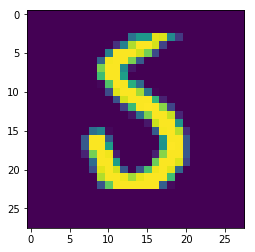

In [17]:
plt.imshow(a[0][0].reshape(28,28))

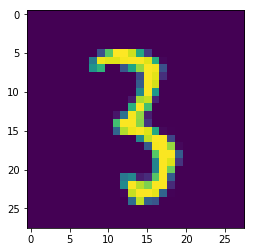

In [18]:
plt.imshow(a[0][1].reshape(28,28))

In [19]:
model.predict_classes(a[0][:2])

2/2 [==============================] - 0s


array([6, 3])